In [21]:
import numpy as np
import pywt
import pandas as pd

In [22]:
# 生成测试数据
datatest = pd.read_excel('../Resource/ExperimentDataBase/CV1(1).xlsx')
cols = ['SAVI','EVI','TCART','CIrededge１','DVI','OSAVI','RDVI','TVI','MNVI','MSAVI','MTVI','CV']
data = datatest[cols]

# 对信号进行小波变换
w = pywt.Wavelet('db4')
coeffs = pywt.wavedec(data, w, level=12,axis=0)

D:\PythonFile\TestAI\venv\Lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 12 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [23]:

# 对小波系数进行一阶差分
diff_coeffs = np.diff(coeffs, axis=1)

# 将一阶差分后的小波系数替换原来的系数
new_coeffs = [coeffs[0]] + [diff_coeffs[i-1] for i in range(1, len(coeffs))]

# 将变换后的系数重构回原信号
y_reconstructed = pywt.waverec(new_coeffs, w)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (13,) + inhomogeneous part.

NameError: name 'y_reconstructed' is not defined

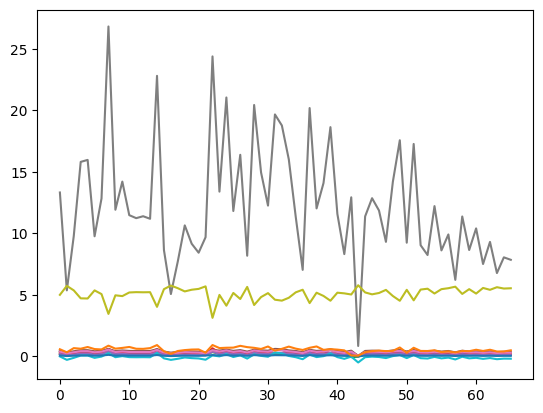

In [19]:
# 绘制原信号和重构后的信号
import matplotlib.pyplot as plt
plt.plot(data, label='Original signal')
plt.plot(y_reconstructed, label='Wavelet transform with first-order derivative')
plt.legend()
plt.show()

In [ ]:
result = pd.DataFrame({'Reconstructed': y_reconstructed})
result.to_excel('WT_Reconstructed_result.xlsx', index=False)